In [5]:
# Cell 1: Import libraries and load data
import pandas as pd
df = pd.read_csv('items for inclisiran 284mg_1.5ml inj pre-filled syringes per (1).csv')
print(df.head())

# Cell 2: Display initial data info
print(df.info())

# Cell 3: Data cleaning operations
df = df.dropna(subset=['y_items'])
df.drop(columns=['id', 'x_items', 'x_actual_cost'], inplace=True)

# Cell 4: Display cleaned data
print(df.head())
print(df.info())


         date   id                       name  y_items  y_actual_cost  \
0  2019-02-01  00L         NHS NORTHUMBERLAND        0            0.0   
1  2019-02-01  00N         NHS SOUTH TYNESIDE        0            0.0   
2  2019-02-01  00P             NHS SUNDERLAND        0            0.0   
3  2019-02-01  00Q  NHS BLACKBURN WITH DARWEN        0            0.0   
4  2019-02-01  00R              NHS BLACKPOOL        0            0.0   

   x_items  x_actual_cost  
0        0              0  
1        0              0  
2        0              0  
3        0              0  
4        0              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           6420 non-null   object 
 1   id             6420 non-null   object 
 2   name           6420 non-null   object 
 3   y_items        6420 non-null   int64  
 4   y_actual_cost  642

In [8]:
from google.colab import files
files.download('cleaned_data.csv')

<class 'ModuleNotFoundError'>: No module named 'google.colab'

In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv('items for inclisiran 284mg_1.5ml inj pre-filled syringes per (1).csv')  # Replace with your actual file path

# Remove rows where 'y_items' and 'y_actual_cost' are zero
df = df[(df['y_items'] != 0) | (df['y_actual_cost'] != 0)]

# Drop the 'x_items' and 'x_actual_cost' columns
df.drop(columns=['x_items', 'x_actual_cost', 'id', 'name', 'y_actual_cost'], inplace=True)

# Remove duplicate rows
df = df.drop_duplicates()

# Save the cleaned data to a new CSV file (optional)
df.to_csv('cleaned_data.csv', index=False)

# Print the first few rows of the cleaned dataset to verify changes
print(df.head())


            date  y_items
3631  2021-11-01        1
3635  2021-11-01        2
3636  2021-11-01        3
3727  2021-12-01        1
3736  2021-12-01        2


In [17]:
# Group by 'date' and sum 'y_items' for each date
date_grouped = df.groupby('date')['y_items'].sum().reset_index()

# Save the grouped data to a new CSV file (optional)
date_grouped.to_csv('grouped_data_by_date.csv', index=False)

# Print the grouped data to verify changes
print(date_grouped.head())

         date  y_items
0  2021-11-01        6
1  2021-12-01       15
2  2022-01-01       31
3  2022-02-01       56
4  2022-03-01       56


In [18]:
# Group by 'date' and sum 'y_items' for each date
date_grouped = df.groupby('date')['y_items'].sum().reset_index()

# Calculate the total sum of 'y_items' across all dates
total_y_items = date_grouped['y_items'].sum()

# Print the total sum of 'y_items'
print("Total sum of y_items across all dates:", total_y_items)

# Save the grouped data to a new CSV file (optional)
date_grouped.to_csv('grouped_data_by_date.csv', index=False)

# Print the grouped data to verify changes
print(date_grouped.head())

Total sum of y_items across all dates: 12234
         date  y_items
0  2021-11-01        6
1  2021-12-01       15
2  2022-01-01       31
3  2022-02-01       56
4  2022-03-01       56


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('grouped_data_by_date.csv')  # Replace 'path_to_your_file.csv' with the actual path to your file

# Convert 'date' column to datetime if not already done
df['date'] = pd.to_datetime(df['date'])

# Extract year from the 'date' column and create a new column 'year'
df['year'] = df['date'].dt.year

# Group by 'year' and sum 'y_items'
yearly_totals = df.groupby('year')['y_items'].sum().reset_index()

# Save the yearly totals to a new CSV file (optional)
yearly_totals.to_csv('yearly_totals.csv', index=False)

# Print the yearly totals to verify
print(yearly_totals)


   year  y_items
0  2021       21
1  2022     1727
2  2023     8709
3  2024     1777


In [1]:
import pandas as pd

# Load your dataset
file_path = 'grouped_data_by_date.csv'  # Change to your file path
data = pd.read_csv(file_path)


In [2]:
# Display the first few rows of the dataset
print(data.head())

# Check the data types of each column
print(data.dtypes)


         date  y_items
0  2021-11-01        6
1  2021-12-01       15
2  2022-01-01       31
3  2022-02-01       56
4  2022-03-01       56
date       object
y_items     int64
dtype: object


In [3]:
# Convert 'date' column to datetime format if it's not already
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')  # Adjust the format as necessary


In [4]:
# Set the date column as the index of the dataframe
data.set_index('date', inplace=True)


In [5]:
# Check for missing values in the dataset
print(data.isnull().sum())

# Optional: Fill missing values, if any. Methods could be forward filling, backward filling, or filling with mean.
data.fillna(method='ffill', inplace=True)  # Forward fill
# data.fillna(method='bfill', inplace=True)  # Backward fill
# data.fillna(data.mean(), inplace=True)  # Fill with mean


y_items    0
dtype: int64


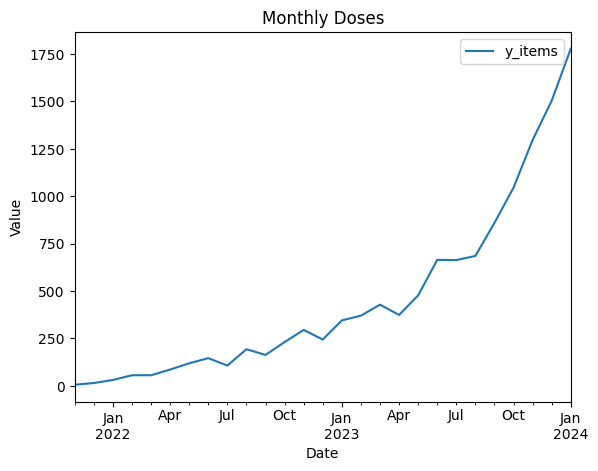

In [7]:
import matplotlib.pyplot as plt

# Plotting the time series data
data.plot()
plt.title('Monthly Doses')
plt.xlabel('Month')
plt.ylabel('Items for Inclisiran')  # Adjust the label according to what 'value' represents
plt.show()


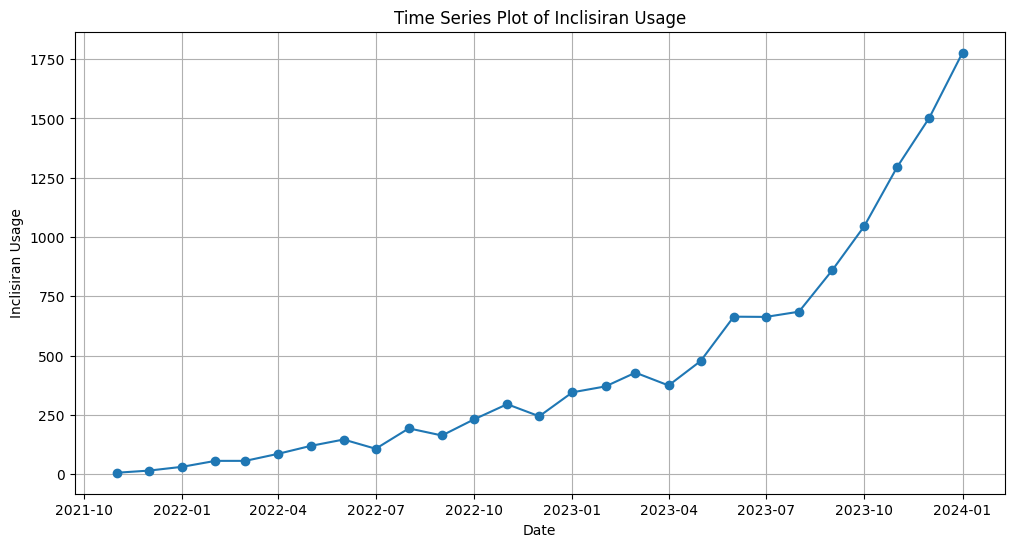

           y_items
count    27.000000
mean    453.111111
std     474.935569
min       6.000000
25%     113.000000
50%     295.000000
75%     663.500000
max    1777.000000
count      27.000000
mean      453.111111
std       474.935569
min         6.000000
25%       113.000000
50%       295.000000
75%       663.500000
max      1777.000000
Name: y_items, dtype: float64
Skewness: 1.4665448675792245
Kurtosis: 1.5513426467423184
ADF Statistic: 3.735589
p-value: 1.000000
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load your dataset
file_path = 'grouped_data_by_date.csv'  # Make sure to update this with the actual file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['y_items'], marker='o', linestyle='-')
plt.title('Time Series Plot of Inclisiran Usage')
plt.xlabel('Date')
plt.ylabel('Inclisiran Usage')
plt.grid(True)
plt.show()

# Descriptive statistics
print(data.describe())

# Calculating descriptive statistics
descriptive_stats = data['y_items'].describe()
skewness = data['y_items'].skew()
kurtosis = data['y_items'].kurt()

# Printing descriptive statistics
print(descriptive_stats)
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Test for stationarity
result = adfuller(data['y_items'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


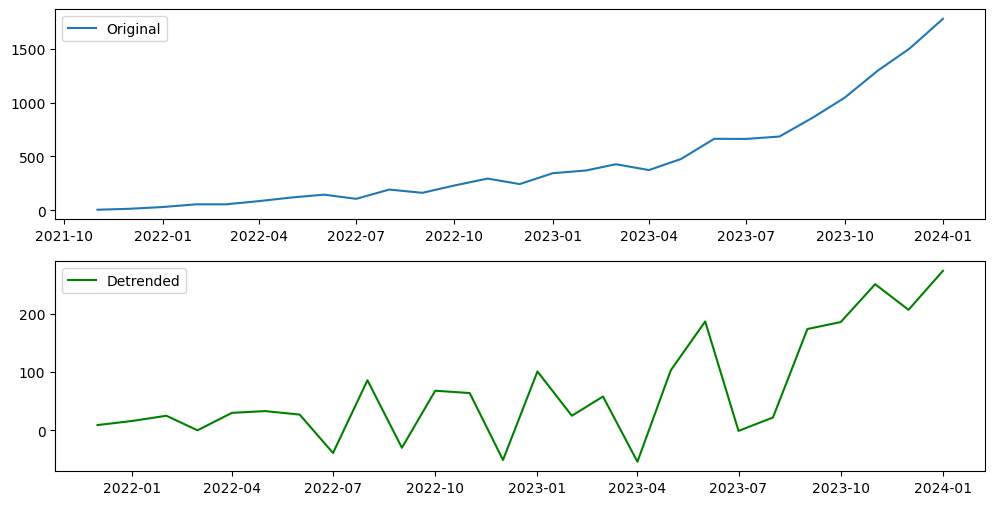

In [11]:
# Assuming 'data' is your DataFrame

# Apply first differencing
data['detrended'] = data['y_items'].diff()

# Plot the original and the detrended data
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(data.index, data['y_items'], label='Original')
plt.legend()

plt.subplot(212)
plt.plot(data.index, data['detrended'], label='Detrended', color='green')
plt.legend()
plt.show()


In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['y_items'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, the series is not stationary and you may need to difference it
if result[1] > 0.05:
    data['diff_y_items'] = data['y_items'].diff().dropna()

# Print the differenced data
    print("Differenced data:")
    print(data['diff_y_items'])
else:
    print("The data is stationary; no differencing needed.")


ADF Statistic: 3.73558913452974
p-value: 1.0
Differenced data:
date
2021-11-01      NaN
2021-12-01      9.0
2022-01-01     16.0
2022-02-01     25.0
2022-03-01      0.0
2022-04-01     30.0
2022-05-01     33.0
2022-06-01     27.0
2022-07-01    -39.0
2022-08-01     86.0
2022-09-01    -30.0
2022-10-01     68.0
2022-11-01     64.0
2022-12-01    -51.0
2023-01-01    101.0
2023-02-01     25.0
2023-03-01     58.0
2023-04-01    -54.0
2023-05-01    103.0
2023-06-01    187.0
2023-07-01     -1.0
2023-08-01     22.0
2023-09-01    174.0
2023-10-01    186.0
2023-11-01    251.0
2023-12-01    207.0
2024-01-01    274.0
Name: diff_y_items, dtype: float64


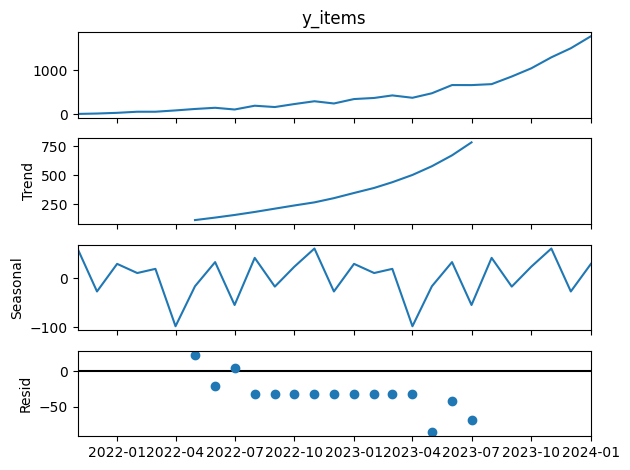

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assume 'data' is your time series with a DateTime index
decomposition = seasonal_decompose(data['y_items'], model='additive', period=12)  # Use 'multiplicative' if the seasonal effect is proportional to the level of the time series

# Plot the separated components
decomposition.plot()
plt.show()
